In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset (PNAS Smart-seq-total paper)

Large dataset with rows representing genes and columns cells, with entries the recorded transcript counts
- ~50,000 genes listed but many have zero counts recorded and are not relevant / useful
- 3 types of cells combined: fibroblasts, HEK, MCF cell lines

In [3]:
data = pd.read_csv("./Datasets/GSE151334_counts.human_download.csv", index_col=0)

In [4]:
data.head()

,Fibroblasts_A10_S10,Fibroblasts_A11_S11,Fibroblasts_A2_S2,Fibroblasts_A3_S3,Fibroblasts_A4_S4,Fibroblasts_A5_S5,Fibroblasts_A7_S7,Fibroblasts_A8_S8,Fibroblasts_B10_S34,Fibroblasts_B11_S35,...,MCF7_O11_S347,MCF7_O12_S348,MCF7_O13_S349,MCF7_O17_S353,MCF7_O4_S340,MCF7_O5_S341,MCF7_O9_S345,MCF7_P17_S377,MCF7_P3_S363,MCF7_P4_S364
7SK,18,3,6,8,35,0,0,21,9,9,...,100,25,44,40,16,37,11,14,15,18
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Separate the 3 cell types

In [5]:
Fibroblast_columns = [name for name in list(data.columns) if 'Fibroblasts' in name]
HEK_columns = [name for name in list(data.columns) if 'HEK293T' in name]
MCF_columns = [name for name in list(data.columns) if 'MCF7' in name]

data_FIB = data[Fibroblast_columns]
data_HEK = data[HEK_columns]
data_MCF = data[MCF_columns]

print(f"{len(Fibroblast_columns)} Fibroblast cells \n{len(HEK_columns)} HEK cells \n{len(MCF_columns)} MCF cells")

278 Fibroblast cells 
260 HEK cells 
95 MCF cells


### Remove zero count genes

In [6]:
data_cleaned_FIB = data_FIB[data_FIB.max(axis=1) > 0]
data_cleaned_HEK = data_HEK[data_HEK.max(axis=1) > 0]
data_cleaned_MCF = data_MCF[data_MCF.max(axis=1) > 0]

print(f"{data_FIB.shape[0] - data_cleaned_FIB.shape[0]} genes with zero counts in Fibroblasts cells")
print(f"{data_HEK.shape[0] - data_cleaned_HEK.shape[0]} genes with zero counts in HEK cells")
print(f"{data_MCF.shape[0] - data_cleaned_MCF.shape[0]} genes with zero counts in MCF cells")

23860 genes with zero counts in Fibroblasts cells
22139 genes with zero counts in HEK cells
33236 genes with zero counts in MCF cells


### Remove low mean expression genes

Expect that genes with low mean expression (< 1) will be difficult to obtain any results from and so drop from dataset for initial tests.

However, interaction can often 'switch off' genes leading to low mean expressions so need to be careful removing these. Look at the mean expression of results and see if we are able to infer any behaviour: may suggest dropped genes should be re-visited.

In [7]:
thresh = 1

data_thresh_FIB = data_cleaned_FIB[data_cleaned_FIB.mean(axis=1) > thresh]
data_thresh_HEK = data_cleaned_HEK[data_cleaned_HEK.mean(axis=1) > thresh]
data_thresh_MCF = data_cleaned_MCF[data_cleaned_MCF.mean(axis=1) > thresh]

print(f"{data_cleaned_FIB.shape[0] - data_thresh_FIB.shape[0]} genes with mean counts < {thresh} in Fibroblasts cells")
print(f"{data_cleaned_HEK.shape[0] - data_thresh_HEK.shape[0]} genes with mean counts < {thresh} in HEK cells")
print(f"{data_cleaned_MCF.shape[0] - data_thresh_MCF.shape[0]} genes with mean counts < {thresh} in MCF cells")

22899 genes with mean counts < 1 in Fibroblasts cells
22442 genes with mean counts < 1 in HEK cells
12457 genes with mean counts < 1 in MCF cells


### Mean expression histograms

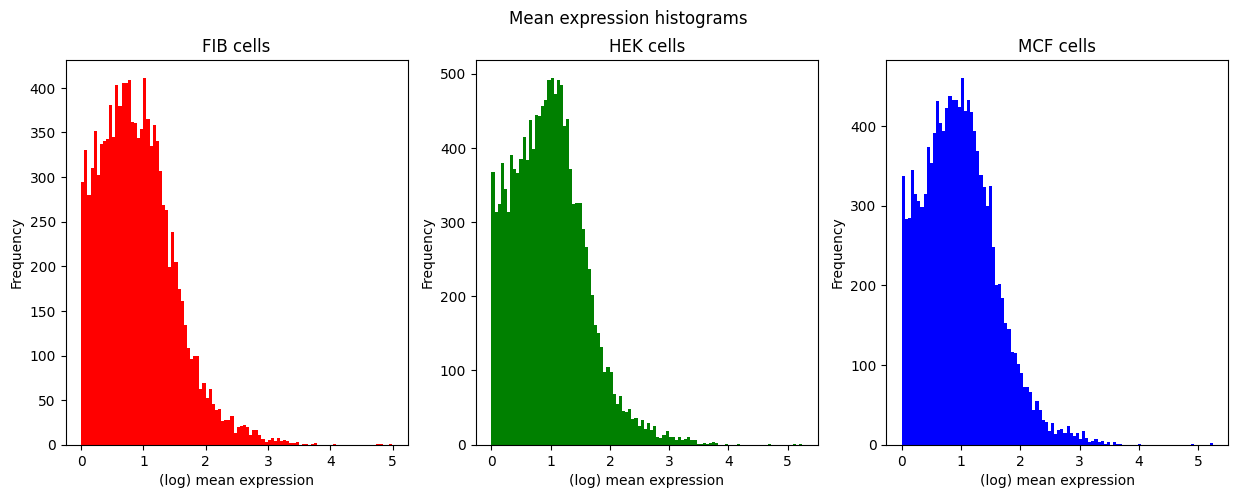

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

plt.suptitle("Mean expression histograms")

FIB_log_means = np.log10(data_thresh_FIB.mean(axis=1))
FIB_hist = axs[0].hist(FIB_log_means, bins=100, color="red");
axs[0].set_title("FIB cells")
axs[0].set_xlabel("(log) mean expression")
axs[0].set_ylabel("Frequency")

HEK_log_means = np.log10(data_thresh_HEK.mean(axis=1))
HEK_hist = axs[1].hist(HEK_log_means, bins=100, color="green");
axs[1].set_title("HEK cells")
axs[1].set_xlabel("(log) mean expression")
axs[1].set_ylabel("Frequency")

MCF_log_means = np.log10(data_thresh_MCF.mean(axis=1))
MCF_hist = axs[2].hist(MCF_log_means, bins=100, color="blue");
axs[2].set_title("MCF cells")
axs[2].set_xlabel("(log) mean expression")
axs[2].set_ylabel("Frequency")

plt.show()

### Save cleaned and threshold datasets

In [9]:
data_cleaned_FIB.to_csv("./Datasets/GSE151334_FIB_counts_cleaned.csv")
data_cleaned_HEK.to_csv("./Datasets/GSE151334_HEK_counts_cleaned.csv")
data_cleaned_MCF.to_csv("./Datasets/GSE151334_MCF_counts_cleaned.csv")

In [10]:
data_thresh_FIB.to_csv("./Datasets/GSE151334_FIB_counts_thresh.csv")
data_thresh_HEK.to_csv("./Datasets/GSE151334_HEK_counts_thresh.csv")
data_thresh_MCF.to_csv("./Datasets/GSE151334_MCF_counts_thresh.csv")